### Exercise 4.10 Coding Etiquette & Excel Reporting 

#### Part 1

1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

### Import libraries

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Assign path

In [6]:
path = r"C:\Users\sahin\Documents\Instacart Basket Analysis"

#### Import the exported data set from Exercise 4.9

In [7]:
df_ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', '4.9_part1_ords_prods_customer.pkl'))

#### Check shape

In [8]:
df_ords_prods_cust_merged.shape

(32641268, 28)

#### Check headers

In [9]:
df_ords_prods_cust_merged.head(1)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

*** There is PII data in this data set. Below is a list of data that can be used to traced back to a particular person.
 ** Surname**
*** These names cannot be used in this analysis. Instead of deleting "surname" column, a copy of the data set will be made without this column.  

In [10]:
df_ords_prods_cust_merged = df_ords_prods_cust_merged.drop(columns = ['surname'])

In [11]:
df_ords_prods_cust_merged.head(1)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
*** Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
*** Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

#### create 'region' column that divides states up into regions based on wikipedia grouping https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [12]:
result = []

for value in df_ords_prods_cust_merged['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):       
        result.append('Midwest')
    elif (value == 'Delaware') or(value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansa') or (value == 'Louisiana'):        
        result.append('South')
    else:
        result.append('West')

    

#### print the results

In [13]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'We

#### Create new column within dataframe and set it equal to result

In [14]:
df_ords_prods_cust_merged['region'] = result

#### Check the count for each region

In [15]:
df_ords_prods_cust_merged['region'].value_counts(dropna = False)

South        10229938
West          8993963
Midwest       7652535
Northeast     5764832
Name: region, dtype: int64

In [16]:
df_ords_prods_cust_merged.shape

(32641268, 28)

** Numbers of rows match.

#### check to make sure length of states matches region count


In [17]:
len(df_ords_prods_cust_merged['state'])

32641268

In [18]:
10229938+8993963+7652535+5764832

32641268

#### change dtype category

In [19]:
df_ords_prods_cust_merged['region'] = df_ords_prods_cust_merged['region'].astype('category')

*** Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

#### creating crosstab of spending habits of different US regions

In [20]:
crosstab = pd.crosstab(df_ords_prods_cust_merged['region'], df_ords_prods_cust_merged['order_frequency_flag'], dropna = False)

In [21]:
crosstab

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,5038934,880834,1732767
Northeast,3816729,644820,1303283
South,6785702,1171066,2273170
West,5997823,1017891,1978249


** Spending habits between the regions is not different. The South has the highest number of frequent(royal) customers, however when look into all four regions' proportion of their total populations are very close to eachothers.

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

#### create a flag for low-activity customers based on less than 5 orders (exercise 4.8)

In [22]:
df_ords_prods_cust_merged.loc[df_ords_prods_cust_merged['max_order'] < 5, 'exclusion_flag'] = 'low_activity_customer'

#### create a flag for non_low_activity customers based on equal or more than 5 orders (exercise 4.8)

In [23]:
df_ords_prods_cust_merged.loc[df_ords_prods_cust_merged['max_order'] >= 5, 'exclusion_flag'] = 'non_low_activity_customer'

#### check exclusion flag

In [24]:
df_ords_prods_cust_merged['exclusion_flag'].value_counts(dropna = False)

non_low_activity_customer    31929979
low_activity_customer          711289
Name: exclusion_flag, dtype: int64

#### check dtype of new variables

In [25]:
df_ords_prods_cust_merged['exclusion_flag'].dtype

dtype('O')

** "0" which stand for object, panda version of the string

#### convert the exclusion_flag column to category format

In [26]:
df_ords_prods_cust_merged['exclusion_flag'] = df_ords_prods_cust_merged['exclusion_flag'].astype('category')

#### check the dtype of new variables

In [27]:
df_ords_prods_cust_merged['exclusion_flag'].dtypes

CategoricalDtype(categories=['low_activity_customer', 'non_low_activity_customer'], ordered=False)

#### create a subset data set with only low_activity_customer (exercise 4.4)

In [28]:
df_low = df_ords_prods_cust_merged[df_ords_prods_cust_merged['exclusion_flag']=='low_activity_customer']

#### check the value for max orders to confirm no orders are above 5

In [29]:
df_low['max_order'].value_counts()

4    711289
Name: max_order, dtype: int64

#### crate a subset with only non_low_activity customer (exercise 4.4)

In [30]:
df_high = df_ords_prods_cust_merged[df_ords_prods_cust_merged['exclusion_flag']=='non_low_activity_customer']

#### check the value for max orders to confirm no orders less than 5

In [31]:
df_high['max_order'].value_counts()

100    1173687
7       825922
9       822821
10      819874
8       816445
        ...   
94       50497
91       48455
98       45019
99       44651
97       40523
Name: max_order, Length: 96, dtype: int64

### export subset for low_activity_customer

In [32]:
df_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_low_activity_cust.pkl'))

### export subset for non_low_activity_customer

In [33]:
df_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_non_low_activity_cust.pkl'))

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### List of all potential variables

In [34]:
df_high.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_the_week        int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                 float64
add_to_cart_order          float16
reordered                  float16
product_name              category
aisle_id                   float16
department_id              float64
prices                     float64
max_order                     int8
loyalty_flag              category
spending                   float16
spending_flag             category
order_frequency            float16
order_frequency_flag      category
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
_merge                    category
region                    category
exclusion_flag      

In [35]:
df_high.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer


In [36]:
df_high.shape

(31929979, 29)

#### Create the age_group of customers

In [37]:
df_high['age'].value_counts().sort_index()

18    492997
19    511257
20    496283
21    505072
22    506080
       ...  
77    493995
78    486974
79    523784
80    507612
81    501958
Name: age, Length: 64, dtype: int64

#### Create age group and if-statement with For-loops for these age groups.

In [38]:
age_group = []

for value in df_high['age']:
    if value <= 20:
        age_group.append('18-20')
    elif (value > 20) and (value <= 30):
        age_group.append('21-30')
    elif (value >30) and (value <=40):
        age_group.append('31-40')
    elif (value >40) and (value <= 50):
        age_group.append('41-50')
    elif (value >50) and (value <= 60):
        age_group.append('51-60')
    elif (value >60) and (value <=70):
        age_group.append('61-70')
    elif (value >70) and (value <=80):
        age_group.append('71-80')
    elif (value > 80) and (value <= 82):
        age_group.append('80+')
    else:   
        result.append('Not_in_age_category')

#### Create new age_group column set it equal the age_group

In [39]:
len(age_group)

31929979

In [40]:
df_high['age_group'] = age_group

C:\Users\sahin\AppData\Local\Temp/ipykernel_18072/1810011322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['age_group'] = age_group


In [41]:
df_high.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_group
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer,31-40
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer,31-40
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer,31-40
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer,31-40
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,both,South,non_low_activity_customer,31-40


#### confirm results from new age_group column

In [42]:
df_high['age_group'].value_counts().sort_index()

18-20    1500537
21-30    5001697
31-40    4995500
41-50    5019211
51-60    4984866
61-70    4928259
71-80    4997951
80+       501958
Name: age_group, dtype: int64

In [43]:
df_high['age_group'].shape

(31929979,)

In [44]:
df_high[['age', 'age_group']].tail()

,age,age_group
32641263,74,71-80
32641264,74,71-80
32641265,74,71-80
32641266,74,71-80
32641267,74,71-80


In [45]:
df_high[['age', 'age_group']].head()

,age,age_group
0,31,31-40
1,31,31-40
2,31,31-40
3,31,31-40
4,31,31-40


#### check the income ranges for customers

In [46]:
df_high['income'].value_counts().sort_index()

25903      21
25911      29
25937      40
25941      32
25955     393
         ... 
584097    827
590790     55
591089    177
592409    319
593901    641
Name: income, Length: 101939, dtype: int64

In [47]:
customer_income = df_high['income'].value_counts().sort_index()

In [48]:
customer_income.to_clipboard()

#### Create income brackets 

* find the minumum income amount

In [49]:
df_high['income'].min()

25903

* find the maximum income amount

In [50]:
df_high['income'].max()

593901

In [51]:
income = []

for value in df_high['income']:
    if value <= 25000:
        income.append('0-025000')
    elif (value > 25000) and (value <= 40000):
        income.append('025000-040000')
    elif (value > 40000) and (value <= 80000):
        income.append('040000-080000')
    elif (value > 80000) and (value <= 120000):
        income.append('080000-120000')
    elif (value > 120000) and (value <= 160000):
        income.append('120000-160000')
    elif (value > 160000) and (value <= 210000):
        income.append('160000-210000')
    elif (value > 210000) and (value <= 523000):
        income.append('210000-523000')
    elif (value > 523000):
        income.append('523000+')
    else:
        income.append('other')
        


#### Create new income_range column and set it equal to income

In [52]:
df_high['income_range'] = income

C:\Users\sahin\AppData\Local\Temp/ipykernel_18072/1094272007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['income_range'] = income


#### Check results of income_range

In [53]:
df_high['income_range'].value_counts().sort_index()

025000-040000     1685274
040000-080000     9689372
080000-120000    11110200
120000-160000     7262397
160000-210000     1940066
210000-523000      228111
523000+             14559
Name: income_range, dtype: int64

In [54]:
df_high[['income', 'income_range']].head()

,income,income_range
0,40423,040000-080000
1,40423,040000-080000
2,40423,040000-080000
3,40423,040000-080000
4,40423,040000-080000


In [55]:
df_high[['income', 'income_range']].tail()

,income,income_range
32641263,137969,120000-160000
32641264,137969,120000-160000
32641265,137969,120000-160000
32641266,137969,120000-160000
32641267,137969,120000-160000


#### Create 'parental_status'  flag

* check dependant numbers

In [56]:
df_high['n_dependants'].value_counts().sort_index()

0    7979527
1    7961567
2    7974823
3    8014062
Name: n_dependants, dtype: int64

In [57]:
df_high['n_dependants'].shape

(31929979,)

* create flag for parent (+1 children)

In [58]:
df_high.loc[(df_high['n_dependants'] >= 1), 'parental_status'] = 'Parent'

C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


* create flag for non-parents (0 children)

In [59]:
df_high.loc[(df_high['n_dependants'] == 0), 'parental_status'] = 'Non-Parent'

* check parental_status flag

In [60]:
df_high['parental_status'].value_counts().sort_index()

Non-Parent     7979527
Parent        23950452
Name: parental_status, dtype: int64

In [61]:
df_high['parental_status'].shape

(31929979,)

* head results just for n_dependants & parental_status

In [62]:
df_high[['n_dependants', 'parental_status']].head()

,n_dependants,parental_status
0,3,Parent
1,3,Parent
2,3,Parent
3,3,Parent
4,3,Parent


In [63]:
df_high[['n_dependants', 'parental_status']].tail()

,n_dependants,parental_status
32641263,3,Parent
32641264,3,Parent
32641265,3,Parent
32641266,3,Parent
32641267,3,Parent


#### Check data type of new variables

In [64]:
df_high[['age_group', 'income_range', 'parental_status']].dtypes

age_group          object
income_range       object
parental_status    object
dtype: object

* convert to "age_group", "income_range", "parental_status" from object to category for optimizing memory 

In [65]:
df_high[['age_group', 'income_range', 'parental_status']] = df_high[['age_group', 'income_range', 'parental_status']].astype('category')

C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


* confirm dtype change

In [66]:
df_high[['age_group', 'income_range', 'parental_status']].dtypes

age_group          category
income_range       category
parental_status    category
dtype: object

#### Checking data types of existing variables

In [67]:
df_high.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_the_week        int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                 float64
add_to_cart_order          float16
reordered                  float16
product_name              category
aisle_id                   float16
department_id              float64
prices                     float64
max_order                     int8
loyalty_flag              category
spending                   float16
spending_flag             category
order_frequency            float16
order_frequency_flag      category
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
_merge                    category
region                    category
exclusion_flag      

* convert the "gender", "state", "data_joined", "farm_status", "income_bracket" columns to category for optimizing memory 

In [68]:
df_high[['gender', 'state', 'date_joined', 'fam_status']] = df_high[['gender', 'state', 'date_joined', 'fam_status']].astype('category')

* confirm dtype change

In [69]:
df_high[['gender', 'state', 'date_joined', 'fam_status']].dtypes

gender         category
state          category
date_joined    category
fam_status     category
dtype: object

In [70]:
df_high.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_the_week        int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                 float64
add_to_cart_order          float16
reordered                  float16
product_name              category
aisle_id                   float16
department_id              float64
prices                     float64
max_order                     int8
loyalty_flag              category
spending                   float16
spending_flag             category
order_frequency            float16
order_frequency_flag      category
gender                    category
state                     category
age                          int64
date_joined               category
n_dependants                 int64
fam_status                category
income                       int64
_merge                    category
region                    category
exclusion_flag      

#### Create variable for day of week 

In [71]:
df_high['orders_day_of_the_week'].value_counts().sort_index()

0    6107725
1    5572954
2    4147880
3    3785966
4    3733707
5    4152834
6    4428913
Name: orders_day_of_the_week, dtype: int64

#### Creating "weekday" column with loc function

In [72]:
df_high.loc[df_high['orders_day_of_the_week'] == 0, 'weekday'] = 'Saturday'
df_high.loc[df_high['orders_day_of_the_week'] == 1, 'weekday'] = 'Sunday'
df_high.loc[df_high['orders_day_of_the_week'] == 2, 'weekday'] = 'Monday'
df_high.loc[df_high['orders_day_of_the_week'] == 3, 'weekday'] = 'Tuesday'
df_high.loc[df_high['orders_day_of_the_week'] == 4, 'weekday'] = 'Wednesday'
df_high.loc[df_high['orders_day_of_the_week'] == 5, 'weekday'] = 'Thursday'
df_high.loc[df_high['orders_day_of_the_week'] == 6, 'weekday'] = 'Friday'

C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


* check order totals for the weekdays

In [73]:
df_high['weekday'].value_counts().sort_index()

Friday       4428913
Monday       4147880
Saturday     6107725
Sunday       5572954
Thursday     4152834
Tuesday      3785966
Wednesday    3733707
Name: weekday, dtype: int64

#### Create variable for part of the day

In [74]:
df_high['order_hour_of_day'].value_counts().sort_index()

0      214813
1      113751
2       68154
3       50530
4       52445
5       86914
6      288126
7      883423
8     1700666
9     2426087
10    2725478
11    2695829
12    2574901
13    2620711
14    2649190
15    2619705
16    2493907
17    2052430
18    1607146
19    1237579
20     961743
21     784844
22     625350
23     396257
Name: order_hour_of_day, dtype: int64

* I will define the hours of the days such as: Morning (0-11), Afternoon (12-17), Evening (18-23)

In [75]:
result = []

for value in df_high['order_hour_of_day']:
    if value <= 11:
        result.append('morning')
    elif (value > 11) and (value <= 17):
        result.append('afternoon')
    elif (value > 17) and (value <= 23):
        result.append('evening')
    else:
        result.append('other')

In [76]:
result

['morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'afternoon',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 'morning',
 '

* create new part of the day column and set it equal to result

In [77]:
df_high['part_of_day'] = result

C:\Users\sahin\AppData\Local\Temp/ipykernel_18072/2436990607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['part_of_day'] = result


In [78]:
df_high['part_of_day'].value_counts()

afternoon    15010844
morning      11306216
evening       5612919
Name: part_of_day, dtype: int64

* check totals for family status

In [79]:
df_high['fam_status'].value_counts()

married                             22421852
single                               5248979
divorced/widowed                     2730548
living with parents and siblings     1528600
Name: fam_status, dtype: int64

## Create visualizations to show the distribution of profiles.

* First step is to define what product are selling the best

In [80]:
df_high.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,_merge,region,exclusion_flag,age_group,income_range,parental_status,weekday,part_of_day
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,married,40423,both,South,non_low_activity_customer,31-40,040000-080000,Parent,Monday,morning
1,2539329,1,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,...,married,40423,both,South,non_low_activity_customer,31-40,040000-080000,Parent,Monday,morning
2,2539329,1,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,...,married,40423,both,South,non_low_activity_customer,31-40,040000-080000,Parent,Monday,morning
3,2539329,1,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,...,married,40423,both,South,non_low_activity_customer,31-40,040000-080000,Parent,Monday,morning
4,2539329,1,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,...,married,40423,both,South,non_low_activity_customer,31-40,040000-080000,Parent,Monday,morning


In [81]:
crosstab = df_high.head(10) 

In [82]:
crosstab.to_clipboard()

#### Get the amount of sales for each product_ id

In [83]:
sales_by_product_id = df_high.groupby('product_id').agg({'prices' : ['min', 'mean', 'max', 'sum']})

In [84]:
sales_by_product_id.to_clipboard()

#### Get the amount of sales for each product name

In [85]:
sales_by_product_name = df_high.groupby('product_name').agg({'prices' : ['min', 'mean', 'max', 'sum']})

In [86]:
sales_by_product_name.to_clipboard()

#### Get the amount of order for each product name

In [87]:
product_sales_by_order_number = df_high.groupby('product_name').agg({'order_number' : ['min', 'mean', 'max', 'sum']})

In [88]:
product_sales_by_order_number.to_clipboard()

#### crosstab of age_group & income_bracket variables

In [89]:
xtab_age_income = pd.crosstab(df_high['age_group'], df_high['income_range'], dropna = False)

In [90]:
xtab_age_income

income_range,025000-040000,040000-080000,080000-120000,120000-160000,160000-210000,210000-523000,523000+
age_group,,,,,,,
18-20,104698,928712,450579,6416,7399,2733,0
21-30,361424,3059185,1522661,19943,21671,16813,0
31-40,348789,3078445,1504547,22506,21166,20047,0
41-50,204529,644183,1865737,1766030,479190,55534,4008
51-60,220604,652013,1850332,1757982,460777,40044,3114
61-70,217405,619815,1846142,1740439,457037,45791,1630
71-80,204691,641845,1885711,1762987,454761,43260,4696
80+,23134,65174,184491,186094,38065,3889,1111


#### crosstab of age_group & parental status variables

In [91]:
xtab_age_group_parental_status = pd.crosstab(df_high['age_group'], df_high['parental_status'], dropna = False)

In [92]:
xtab_age_group_parental_status

parental_status,Non-Parent,Parent
age_group,,
18-20,355859,1144678
21-30,1265011,3736686
31-40,1244134,3751366
41-50,1234808,3784403
51-60,1264539,3720327
61-70,1248961,3679298
71-80,1223703,3774248
80+,142512,359446


#### crosstab of age_group & part_of_day variables

In [93]:
xtab_age_group_part_of_day = pd.crosstab(df_high['age_group'], df_high['part_of_day'], dropna = False)

In [94]:
xtab_age_group_part_of_day

part_of_day,afternoon,evening,morning
age_group,,,
18-20,706094,261420,533023
21-30,2356285,869814,1775598
31-40,2344298,877689,1773513
41-50,2356948,891245,1771018
51-60,2346456,874155,1764255
61-70,2331013,862747,1734499
71-80,2333065,884895,1779991
80+,236685,90954,174319


#### crosstab of age-group & loyalty_flag variables

In [95]:
xtab_age_group_loyalty_flag = pd.crosstab(df_high['age_group'], df_high['loyalty_flag'], dropna = False)

In [96]:
xtab_age_group_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
18-20,486031,228843,785663
21-30,1651506,768695,2581496
31-40,1678233,744212,2573055
41-50,1690812,762485,2565914
51-60,1667348,765600,2551918
61-70,1666308,759952,2501999
71-80,1672622,760030,2565299
80+,166718,79112,256128


#### crosstab of parental_status & order_frequency variables

In [97]:
xtab_parental_status_order_frequency_flag = pd.crosstab(df_high['parental_status'], df_high['order_frequency_flag'], dropna = False)

In [98]:
xtab_parental_status_order_frequency_flag

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
parental_status,,,
Non-Parent,5349459,823427,1806641
Parent,16118631,2507853,5323968


#### crosstab of age_group & spending_flag variables

In [99]:
xtab_age_group_spending_flag = pd.crosstab(df_high['age_group'], df_high['spending_flag'], dropna = False)

In [100]:
xtab_age_group_spending_flag

spending_flag,High spender,Low spender
age_group,,
18-20,26755,1473782
21-30,92412,4909285
31-40,98164,4897336
41-50,108330,4910881
51-60,92342,4892524
61-70,101792,4826467
71-80,93120,4904831
80+,10805,491153


#### crosstab of department_id & income_bracket variables

In [101]:
xtab_dep_id_income_range = pd.crosstab(df_high['department_id'], df_high['income_range'], dropna = False)

In [102]:
xtab_dep_id_income_range

income_range,025000-040000,040000-080000,080000-120000,120000-160000,160000-210000,210000-523000,523000+
department_id,,,,,,,
1.0,106798,651389,764528,501831,137669,17704,868
2.0,2052,10515,12264,7997,2122,440,13
3.0,51335,340512,405919,265185,72940,11499,593
4.0,393952,2790248,3321133,2165858,570256,44111,3302
5.0,9192,42857,49403,32194,9911,5268,484
6.0,10442,78078,95013,60931,16470,1834,152
7.0,197357,824053,865373,568661,154238,22101,1331
8.0,4566,27191,33266,23038,5629,1633,147
9.0,30837,248021,306430,199926,53566,6159,429


** I need to create department names column

* Import department data

In [103]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [104]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


* Transpose the table

In [105]:
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


* Creating new column for department names

In [106]:
df_high.loc[df_high['department_id'] == 1, 'department_name'] = 'frozen'
df_high.loc[df_high['department_id'] == 2, 'department_name'] = 'other'
df_high.loc[df_high['department_id'] == 3, 'department_name'] = 'bakery'
df_high.loc[df_high['department_id'] == 4, 'department_name'] = 'produce'
df_high.loc[df_high['department_id'] == 5, 'department_name'] = 'alcohol'
df_high.loc[df_high['department_id'] == 6, 'department_name'] = 'international'
df_high.loc[df_high['department_id'] == 7, 'department_name'] = 'beverages'
df_high.loc[df_high['department_id'] == 8, 'department_name'] = 'pets'
df_high.loc[df_high['department_id'] == 9, 'department_name'] = 'dry goods pasta'
df_high.loc[df_high['department_id'] == 10, 'department_name'] = 'bulk'
df_high.loc[df_high['department_id'] == 11, 'department_name'] = 'personel care'
df_high.loc[df_high['department_id'] == 12, 'department_name'] = 'meat seafood'
df_high.loc[df_high['department_id'] == 13, 'department_name'] = 'pantry'
df_high.loc[df_high['department_id'] == 14, 'department_name'] = 'breakfast'
df_high.loc[df_high['department_id'] == 15, 'department_name'] = 'canned goods'
df_high.loc[df_high['department_id'] == 16, 'department_name'] = 'dairy eggs'
df_high.loc[df_high['department_id'] == 17, 'department_name'] = 'household'
df_high.loc[df_high['department_id'] == 18, 'department_name'] = 'babies'
df_high.loc[df_high['department_id'] == 19, 'department_name'] = 'snakcs'
df_high.loc[df_high['department_id'] == 20, 'department_name'] = 'deli'
df_high.loc[df_high['department_id'] == 21, 'department_name'] = 'missing'

C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [107]:
df_high['department_name'].value_counts()

produce            9288860
dairy eggs         5292745
snakcs             2829767
beverages          2633114
frozen             2180787
pantry             1831123
bakery             1147983
canned goods       1041171
deli               1028707
dry goods pasta     845368
household           720087
meat seafood        692678
breakfast           687659
personel care       436395
babies              417536
international       262920
alcohol             149309
pets                 95470
missing              67034
other                35403
bulk                 34011
Name: department_name, dtype: int64

In [108]:
df_high.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_the_week        int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                 float64
add_to_cart_order          float16
reordered                  float16
product_name              category
aisle_id                   float16
department_id              float64
prices                     float64
max_order                     int8
loyalty_flag              category
spending                   float16
spending_flag             category
order_frequency            float16
order_frequency_flag      category
gender                    category
state                     category
age                          int64
date_joined               category
n_dependants                 int64
fam_status                category
income                       int64
_merge                    category
region                    category
exclusion_flag      

In [109]:
# Key Question 1: What are the busiest days of the week and hours of the day?

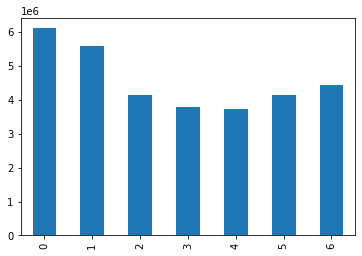

In [110]:
bar1 = df_high['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

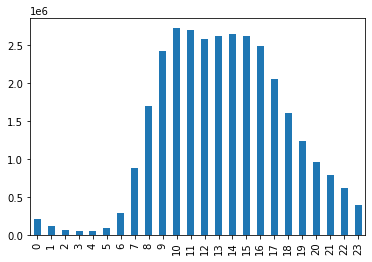

In [111]:
bar_busiest_hour = df_high['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [112]:
# Key Question 2: Are there particular times of the week when people spend most money?

4.9 Task part 2

SyntaxError: invalid syntax (Temp/ipykernel_18072/3818784.py, line 3)

In [ ]:
# Key Question 4: Are there types of products that are more popular than others? Which department has the highest number of product orders?

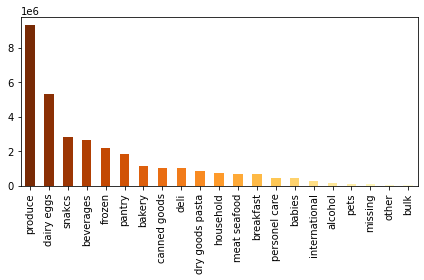

In [114]:
# Create visual to show which department sell the most
bar_top_selling_departments = df_high['department_name'].value_counts().plot.bar(color = sns.color_palette('YlOrBr_r', 21))
plt.tight_layout()

In [ ]:
# Key Question 5a: What's the distribution among users in regards to their brand loyalty? 

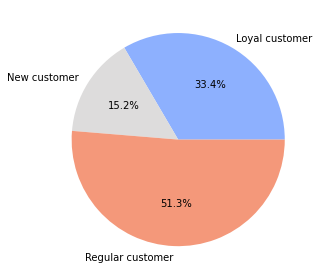

In [115]:
# distribution among customers in regards to brand loyalty
brand_loyalty_flag_pie = df_high['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm',3))
plt.ylabel('')
plt.tight_layout()

In [ ]:
# Key Question 5b: Are there differences in ordering habits based on a customer’s loyalty status? 

In [116]:
# crosstab order_frequency_flag and loyalty_flag
order_frequency_flag_loyalty_flag = pd.crosstab(df_high['order_frequency_flag'], df_high['loyalty_flag'], dropna = False)


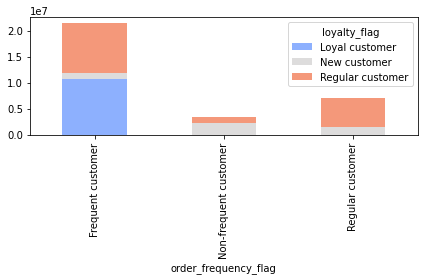

In [117]:
#bar chart loyalty_flag and order_frequency_flag
bar_order_frequency_flag_loyalty_flag = order_frequency_flag_loyalty_flag.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.tight_layout()

In [ ]:
# Key Question 5c : Are there any differences in ordering habits based on a customer's region? 

In [118]:
# Crosstab ordering habits based on a customer region
department_region = pd.crosstab(df_high['department_name'], df_high['region'], dropna = False)

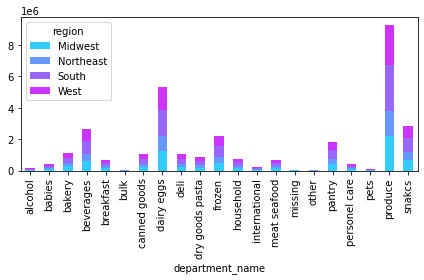

In [119]:
bar_department_region = department_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

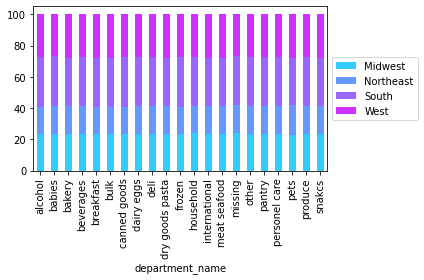

In [120]:
# 100% Stacked bar chart
bar_department_region_100 = department_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [121]:
# Crosstab for age_group and region
age_region = pd.crosstab(df_high['age_group'], df_high['region'], dropna = False)

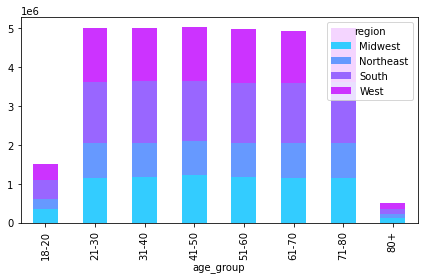

In [122]:
bar_age_region = age_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

In [ ]:
# Key Question 5 d : Is there a connection between age and family status in terms of ordering habits?

In [124]:
# Crosstab for age and department name
age_department = pd.crosstab(df_high['department_name'], df_high['age_group'], dropna = False)

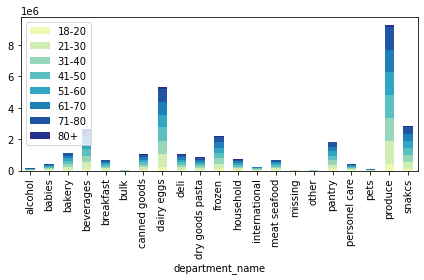

In [125]:
# Create visual for age and departmen name
bar_age_department = age_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu', 8))
plt.legend(loc='upper left')
plt.tight_layout()

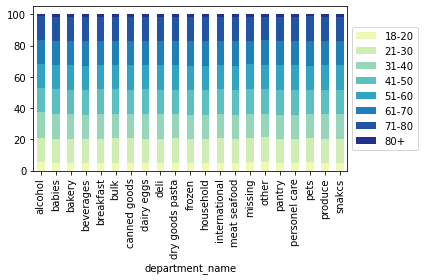

In [ ]:
# 100% stacked bar chart
bar_age_department_100 = age_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu',8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Check totals for fam_status

In [126]:
df_high['fam_status'].value_counts()

married                             22421852
single                               5248979
divorced/widowed                     2730548
living with parents and siblings     1528600
Name: fam_status, dtype: int64

In [127]:
# Crosstab family_status and department_name
family_status_department = pd.crosstab(df_high['department_name'], df_high['fam_status'], dropna = False)

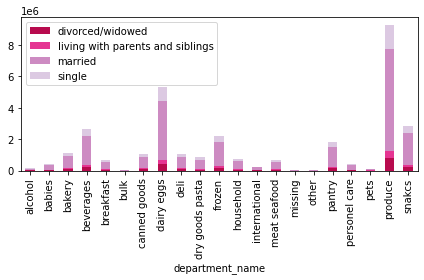

In [128]:
# Create visual for family status and department name
bar_family_status_department = family_status_department.sort_index().plot(kind = 'bar', stacked = True, color = sns.color_palette('PuRd_r', 4))
plt.legend(loc='upper left')
plt.tight_layout()

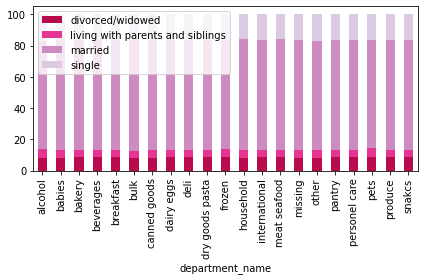

In [ ]:
# 100% family status and department name
bar_family_status_department_100 = family_status_department.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('PuRd_r', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [129]:
#Key Question 5 e : What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '025000-040000'),
  Text(1, 0, '040000-080000'),
  Text(2, 0, '080000-120000'),
  Text(3, 0, '120000-160000'),
  Text(4, 0, '160000-210000'),
  Text(5, 0, '210000-523000'),
  Text(6, 0, '523000+')])

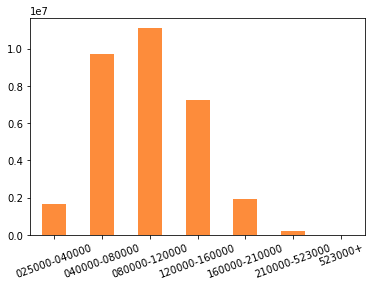

In [130]:
bar_income_range = df_high['income_range'].value_counts().sort_index().plot.bar(color = sns.color_palette('Oranges', 1))
plt.xticks(rotation= 20, horizontalalignment="center")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

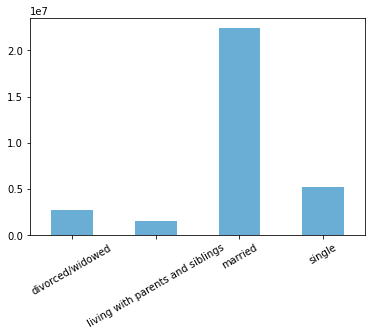

In [131]:
bar_family_status = df_high['fam_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('Blues', 1))
plt.xticks(rotation= 30, horizontalalignment="center")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '18-20'),
  Text(1, 0, '21-30'),
  Text(2, 0, '31-40'),
  Text(3, 0, '41-50'),
  Text(4, 0, '51-60'),
  Text(5, 0, '61-70'),
  Text(6, 0, '71-80'),
  Text(7, 0, '80+')])

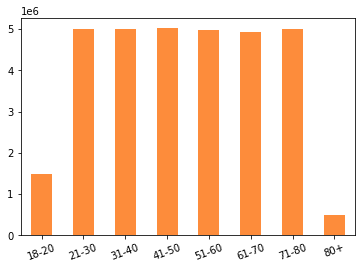

In [132]:
bar_age_group = df_high['age_group'].value_counts().sort_index().plot.bar(color = sns.color_palette('Oranges', 1))
plt.xticks(rotation= 20, horizontalalignment="center")

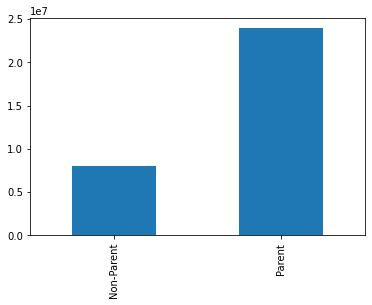

In [133]:
bar_parental_status = df_high['parental_status'].value_counts().sort_index().plot.bar()

In [ ]:
# Key Question 5 f : What differences can you find in ordering habits of different customer profiles?

In [134]:
# Crosstab for department_name and parental_status
department_name_parental_status = pd.crosstab(df_high['department_name'], df_high['parental_status'], dropna = False)

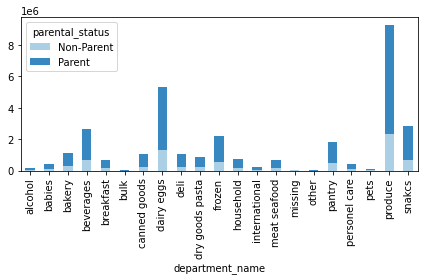

In [135]:
bar_department_name_parental_status = department_name_parental_status.plot.bar(stacked = True, color = sns.color_palette('Blues', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [ ]:
# Crosstab for weekday and parental_status

weekday_parental_status = pd.crosstab(df_high['weekday'], df_high['parental_status'], dropna = False)

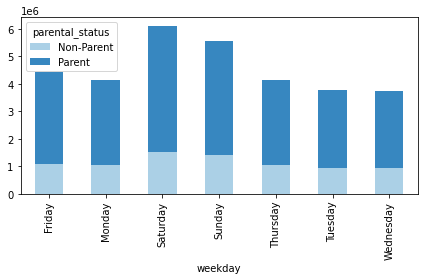

In [ ]:
bar_weekday_parental_status = weekday_parental_status.plot.bar(stacked = True, color = sns.color_palette('Blues', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [136]:
# Crosstab for age_group and spending flag
age_loyalty_flag = pd.crosstab(df_high['age_group'], df_high['loyalty_flag'], dropna = False)

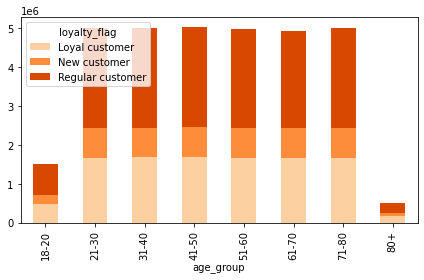

In [137]:
bar_age_loyalty_flag = age_loyalty_flag.plot.bar(stacked = True, color = sns.color_palette('Oranges', 3))
plt.legend(title = 'loyalty_flag',loc='upper left')
plt.tight_layout()

In [ ]:
# Crosstab for number of dependants and loyalty flag
n_dependants_loyalty_flag = pd.crosstab(df_high['n_dependants'], df_high['loyalty_flag'], dropna = False) 

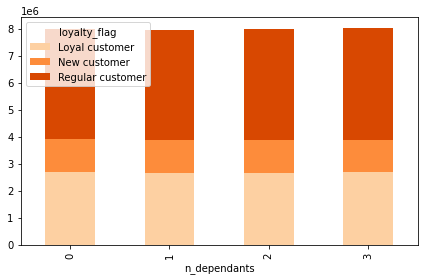

In [ ]:
bar_n_dependants_loyalty_flag = n_dependants_loyalty_flag.plot.bar(stacked = True, color = sns.color_palette('Oranges', 3))
plt.legend(title = 'loyalty_flag',loc='upper left')
plt.tight_layout()

In [138]:
# Crosstab for department name and family status
department_name_family_status = pd.crosstab(df_high['department_name'], df_high['fam_status'], dropna = False)

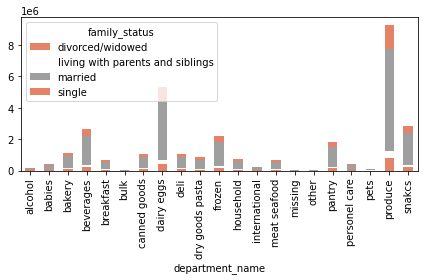

In [139]:
bar_department_name_family_status = department_name_family_status.plot.bar(stacked = True, color = sns.color_palette('RdGy', 3))
plt.legend(title = 'family_status',loc='upper left')
plt.tight_layout()

In [156]:
df_high['prices'].max()

99999.0

In [157]:
df_high.loc[df_high['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [160]:
df_high.loc[(df_high['prices'] <= 15) & (df_high['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [161]:
df_high.loc[df_high['prices'] <=5, 'price_range_loc'] = 'Low-range product'

C:\Users\sahin\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [162]:
df_high['price_range_loc'].value_counts(dropna = False)

Mid-range product     21399096
Low-range product      9910695
High-range product      408336
NaN                     211852
Name: price_range_loc, dtype: int64

In [163]:
# Key Question 3: Marketing and sales want to use simpler price range grouping.

Text(108.68, 0.5, '')

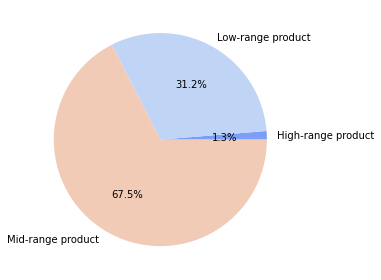

In [164]:
# Distribution of price_range products
pie_price_rance_loc = df_high['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 4))
plt.tight_layout()
plt.ylabel('')

In [166]:
# Crosstab of price_range_loc and spending_flag
price_range_spending_flag = pd.crosstab(df_high['price_range_loc'], df_high['spending_flag'], dropna = False)

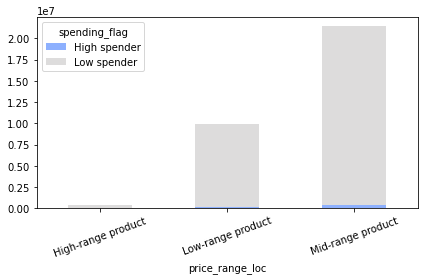

In [167]:
# bar chart price range and spending flag
bar_price_range_spending_flag = price_range_spending_flag.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()